In [ ]:
%pip install numpy
%pip install opencv-python
%pip install matplotlib

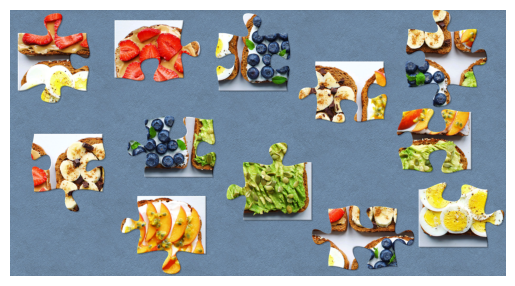

In [31]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import statistics



path = 'puzzles/sandwiches.png'

img_color = cv2.imread(path,1)
img_color = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)

plt.axis("off")
plt.imshow(img_color)
plt.show()

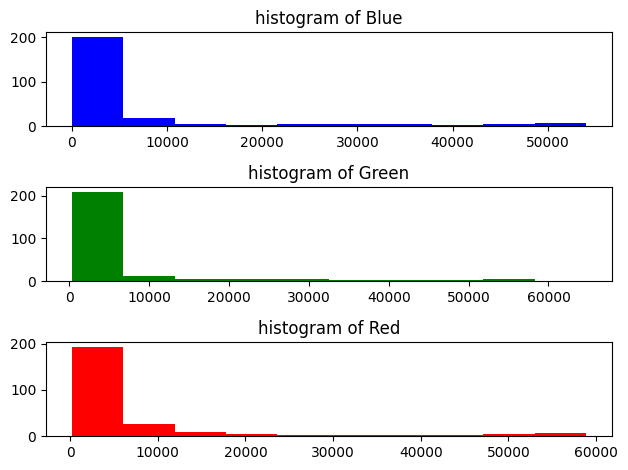

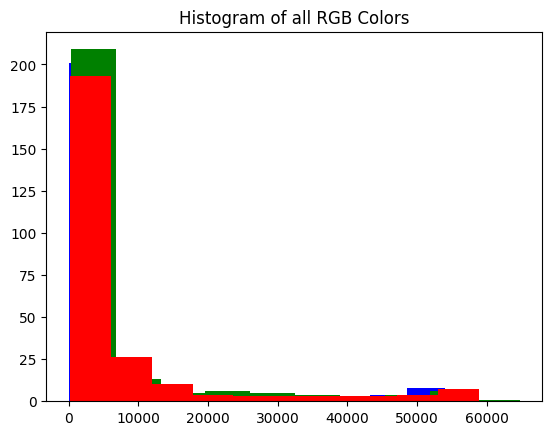

In [48]:
blue_color = cv2.calcHist([img_color], [2], None, [256], [0, 256])
red_color = cv2.calcHist([img_color], [0], None, [256], [0, 256])
green_color = cv2.calcHist([img_color], [1], None, [256], [0, 256])


# Separate Histograms for each color
plt.subplot(3, 1, 1)
plt.title("histogram of Blue")
plt.hist(blue_color, color="blue")
  
plt.subplot(3, 1, 2)
plt.title("histogram of Green")
plt.hist(green_color, color="green")
  
plt.subplot(3, 1, 3)
plt.title("histogram of Red")
plt.hist(red_color, color="red")
  
# for clear view
plt.tight_layout()
plt.show()
  
# combined histogram
plt.title("Histogram of all RGB Colors")
plt.hist(blue_color, color="blue")
plt.hist(green_color, color="green")
plt.hist(red_color, color="red")
plt.show()


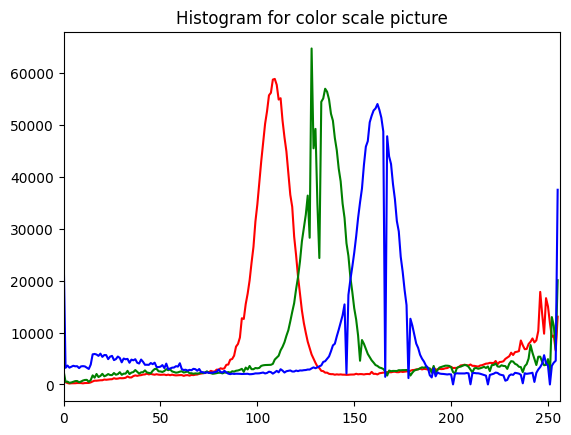

In [47]:
max = [0,0,0];
stddev = [0,0,0];
i=0;
color = ('r','g','b')
for channel,col in enumerate(color):
    histr = cv2.calcHist([img_color],[channel],None,[256],[0,256])
    max[i] = histr.argmax()
    # stddev[i] = statistics.stdev(histr)
    # max[i] = histr.index(histr.max())
    plt.plot(histr,color = col)
    plt.xlim([0,256])
    stddev[i] = np.std(histr.flatten(), axis = 0)
    i=i+1
plt.title('Histogram for color scale picture')
plt.show()

In [57]:
print(max)
print(stddev)

[109, 128, 162]
[54.73267315782746, 46.63849884075489, 57.10499493684852]


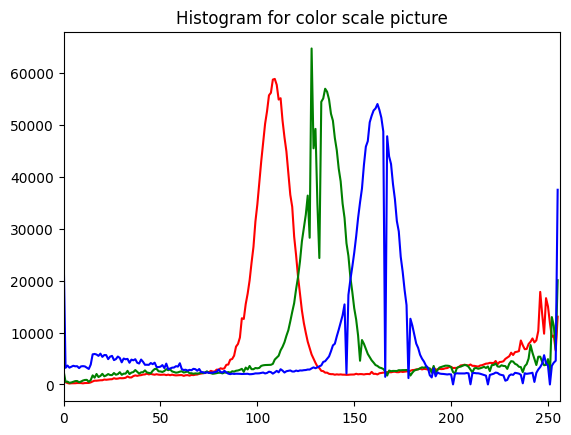

In [56]:
max = [0,0,0]
stddev = [0,0,0]
color_img_array = np.array(img_color)
color = [color_img_array[:,:,0].flatten(), color_img_array[:,:,1].flatten(), color_img_array[:,:,2].flatten()]
c = ('r','g','b')
for i, col in enumerate(color):
    histr, _ = np.histogram(col, bins=256, range=[0, 256])
    max[i] = histr.argmax()
    stddev[i] = np.std(col.flatten(), axis = 0)
    # stddev[i] = statistics.stdev(histr)
    # max[i] = histr.index(histr.max())
    plt.plot(histr, color=c[i])
    plt.xlim([0,256])
plt.title('Histogram for color scale picture')
plt.show()

In [91]:
img_copy = np.copy(img_color)
img_copy.astype(int)
stddev = [int(x) for x in stddev]
for i in range(img_copy.shape[0]):
    for j in range(img_copy.shape[1]):
        if max[0] - stddev[0] < img_copy[i][j][0] and img_copy[i][j][0] <  max[0]+stddev[0]:
            if max[1] - stddev[1] < img_copy[i][j][1] and img_copy[i][j][1] <  max[1]+stddev[1]:
                if max[2] - stddev[2] < img_copy[i][j][2] and img_copy[i][j][2] <  max[2]+stddev[2]:
                    img_copy[i][j] = [0,0,0]

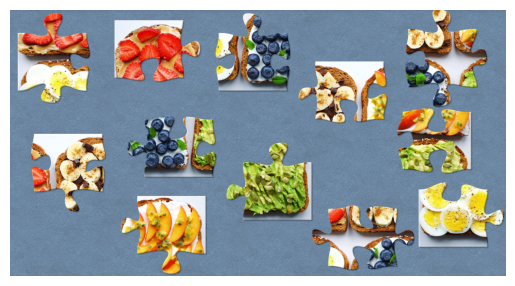

In [92]:
plt.axis("off")
plt.imshow(img_copy)
plt.show()